In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

Считаем пустые ячейки

In [ ]:
data = pd.read_csv("/content/Titanic-Dataset.csv")

# Определим количество пустых ячеек в датасете
empty_cells = data.isna().sum()
print(empty_cells)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Заполняем пустые ячейки

In [ ]:
# Вычисляем медиану столбца Age
median_age = data['Age'].median()

# Заполняем пустые ячейки медианой
data['Age'].fillna(median_age, inplace=True)

# Заполняем пропущенные значения в столбце "Cabin" нулем
data['Cabin'] = data['Cabin'].fillna(0)

# Заполняем пустые ячейки в столбце "Embarked" самым часто встречающимся значением
most_common_embarked = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(most_common_embarked)

# Проверяем количество пустых ячеек
empty_cells = data.isna().sum()
print('Пустые ячейки:')
print(empty_cells)
print()

Пустые ячейки:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64



Делаем анализ признаков

In [ ]:
# Анализ признака "PassengerId"
print("Признак: PassengerId")
print("Количество уникальных значений:", data['PassengerId'].nunique())
print("Минимальное значение:", data['PassengerId'].min())
print("Максимальное значение:", data['PassengerId'].max())
print()

# Анализ признака "Survived"
print("Признак: Survived")
print("Количество уникальных значений:", data['Survived'].nunique())
print("Минимальное значение:", data['Survived'].min())
print("Максимальное значение:", data['Survived'].max())
print()

# Анализ признака "Pclass"
print("Признак: Pclass")
print("Количество уникальных значений:", data['Pclass'].nunique())
print("Минимальное значение:", data['Pclass'].min())
print("Максимальное значение:", data['Pclass'].max())
print()

# Анализ признака "Name"
print("Признак: Name")
print("Количество уникальных значений:", data['Name'].nunique())
print()

# Анализ признака "Sex"
print("Признак: Sex")
print("Количество уникальных значений:", data['Sex'].nunique())
print()

# Пример для признака "Age"
print("Признак: Age")
print("Количество уникальных значений:", data['Age'].nunique())
print("Минимальное значение:", data['Age'].min())
print("Максимальное значение:", data['Age'].max())
print()

# Анализ признака "SibSp"
print("Признак: SibSp")
print("Количество уникальных значений:", data['SibSp'].nunique())
print("Минимальное значение:", data['SibSp'].min())
print("Максимальное значение:", data['SibSp'].max())
print()

# Анализ признака "Parch"
print("Признак: Parch")
print("Количество уникальных значений:", data['Parch'].nunique())
print("Минимальное значение:", data['Parch'].min())
print("Максимальное значение:", data['Parch'].max())
print()

# Анализ признака "Ticket"
print("Признак: Ticket")
print("Количество уникальных значений:", data['Ticket'].nunique())
print("Минимальное значение:", data['Ticket'].min())
print("Максимальное значение:", data['Ticket'].max())
print()

# Пример для признака "Fare"
print("Признак: Fare")
print("Количество уникальных значений:", data['Fare'].nunique())
print("Минимальное значение:", data['Fare'].min())
print("Максимальное значение:", data['Fare'].max())
print()

# Анализ признака "Cabin"
print("Признак: Cabin")
print("Количество уникальных значений:", data['Cabin'].nunique())
print()

# Анализ признака "Embarked"
print("Признак: Embarked")
print("Количество уникальных значений:", data['Embarked'].nunique())
print()

Признак: PassengerId
Количество уникальных значений: 891
Минимальное значение: 1
Максимальное значение: 891

Признак: Survived
Количество уникальных значений: 2
Минимальное значение: 0
Максимальное значение: 1

Признак: Pclass
Количество уникальных значений: 3
Минимальное значение: 1
Максимальное значение: 3

Признак: Name
Количество уникальных значений: 891

Признак: Sex
Количество уникальных значений: 2

Признак: Age
Количество уникальных значений: 88
Минимальное значение: 0.42
Максимальное значение: 80.0

Признак: SibSp
Количество уникальных значений: 7
Минимальное значение: 0
Максимальное значение: 8

Признак: Parch
Количество уникальных значений: 7
Минимальное значение: 0
Максимальное значение: 6

Признак: Ticket
Количество уникальных значений: 681
Минимальное значение: 110152
Максимальное значение: WE/P 5735

Признак: Fare
Количество уникальных значений: 248
Минимальное значение: 0.0
Максимальное значение: 512.3292

Признак: Cabin
Количество уникальных значений: 147

Признак: Emb

Изучаем кореляцию

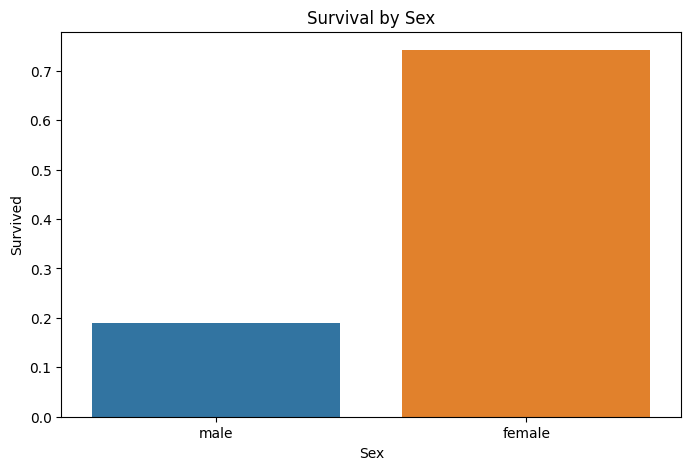

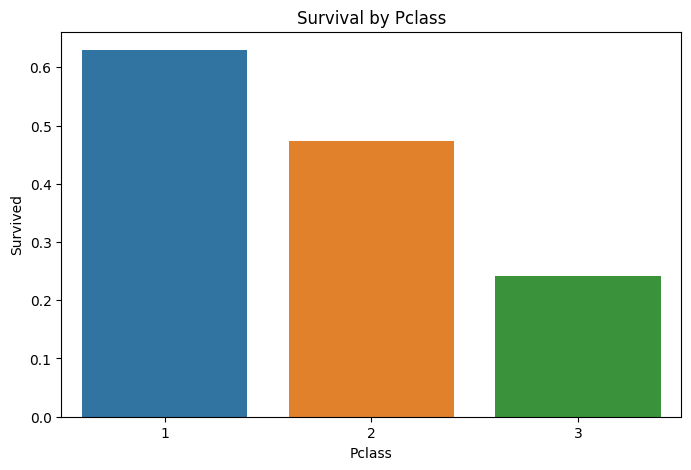

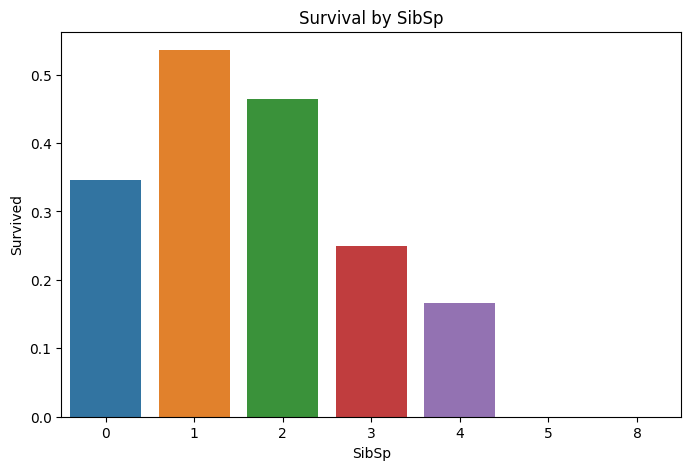

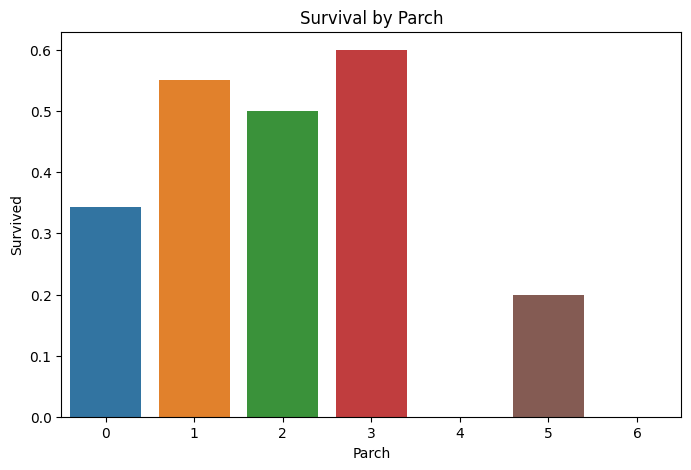

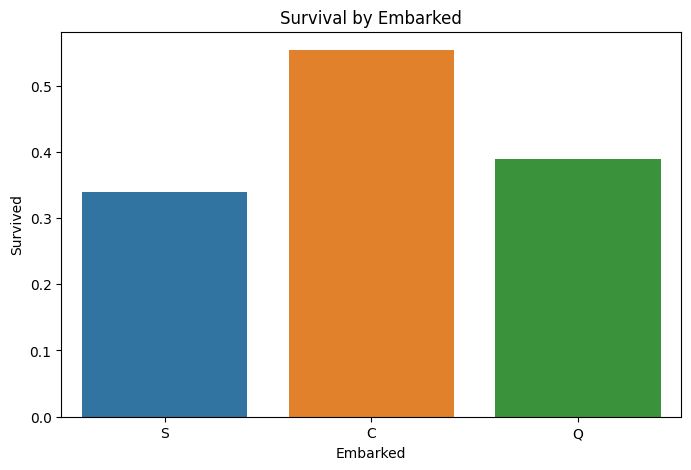

In [ ]:
# Категориальные признаки для анализа
categorical_features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]

# Построение столбчатых графиков
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature, y="Survived", data=data, ci=None)
    plt.title(f"Survival by {feature}")
    plt.show()


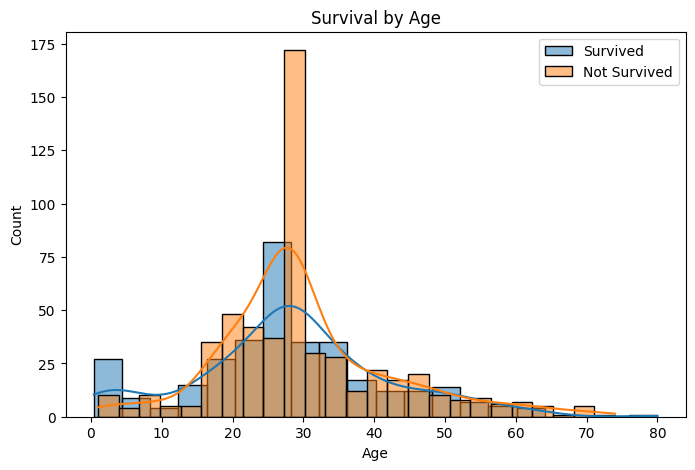

In [ ]:
# Гистограмма для "Age" с разбивкой на выживших и погибших
plt.figure(figsize=(8, 5))
sns.histplot(data[data['Survived'] == 1]['Age'], label='Survived', kde=True)
sns.histplot(data[data['Survived'] == 0]['Age'], label='Not Survived', kde=True)
plt.xlabel("Age")
plt.legend()
plt.title("Survival by Age")
plt.show()

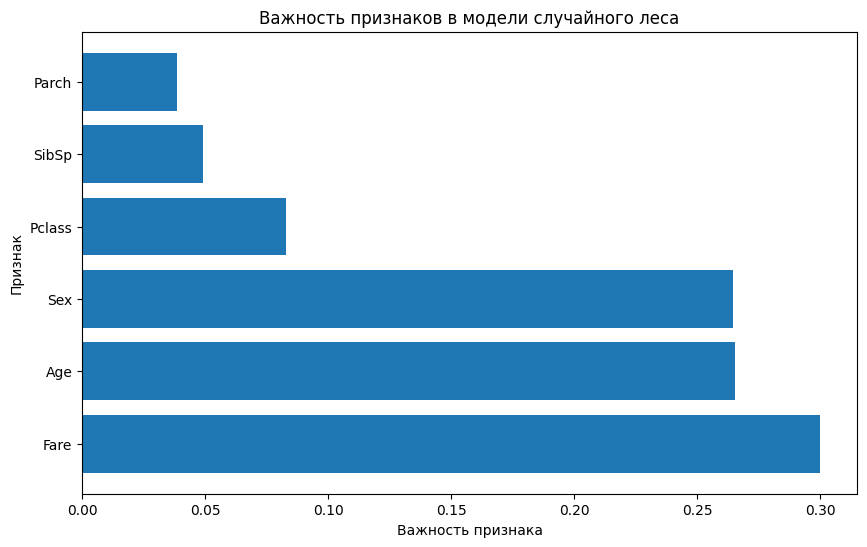

In [92]:
data = pd.read_csv("/content/Titanic-Dataset.csv")

# Заменяем "male" на 0 и "female" на 1 в столбце "Sex"
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

# Выбираем признаки для обучения модели
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

# Разделяем данные на признаки (X) и целевую переменную (y)
X = data[features]
y = data["Survived"]

# Заменяем пустые значения в признаках медианой
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

# Создаем модель случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель
model.fit(X, y)

# Важность признаков
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Создаем график
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.title("Важность признаков в модели случайного леса")
plt.show()


#Вывод
После предварительной обработки данных, такой как заполнение пропущенных значений и кодирование категориальных признаков, мы подготовили данные для обучения модели.

Мы использовали модель случайного леса для оценки важности признаков. Важность признаков позволяет нам понять, какие факторы оказывают наибольшее влияние на выживаемость пассажиров на Титанике. Наибольшее влияние на выживаемость оказывают признаки Sex (пол), Fare (цена билета) и Age (возраст). Женщины имеют больший шанс выживания по сравнению с мужчинами, более высокая цена билета также повышала шщанс выживания, хотя ее влияние явно косвенное (расположение кают, количество человек в каюте и т.д.).